# Q1

## imports

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import math
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import matplotlib.pyplot as plt
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import joblib
import os
from collections import OrderedDict
from natsort import natsorted
from pathlib import Path
import joblib
#initialize the variables neede
path =Path("./Humor,Hist,Media,Food")


global doc_token_list, doc_name , doc_df_preprocessed,file_names
doc_token_list = []
doc_df_preprocessed = pd.DataFrame()


[nltk_data] Downloading package punkt to /Users/nehal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nehal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nehal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## preprocessing 

In [3]:


def remove_punctuation(text):
  text = " ".join(text)
  text = re.sub(r'[-!$%^&*#()_+|@\]\[~=`{}\\:"\';<>?,.\/]','',text)
  text = re.sub(r'[0-9]+','',text)
  text = text.strip()

  return text.split(" ")

def tokenize(text):
  text = word_tokenize(text)
  return text


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = [i for i in text if not i in stop_words]
    return text


def remove_whitespace(text):
  temp = list()
  for i in range(len(text)):
    if len(text[i].split()):
      temp.append("".join(text[i].split()))
  return temp


def preProcess(text):
  text=text.lower()
  text = tokenize(text)
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = remove_whitespace(text)
  return text

doc_name = []

file_names = natsorted(os.listdir(path))

def tokenizeDocs(path):
  for file in file_names:
    f = open(str(path)+"/"+file,'r', encoding ="utf8", errors ="surrogateescape")
    # split the lines for any multiple new lines
    data = f.read()
    pre_processed_data = preProcess(data)
    
    doc_token_list.append(pre_processed_data)
    doc_name.append(file)


tokenizeDocs(path)
joblib.dump(doc_token_list,'doc_token_list.joblib')
doc_df_preprocessed= pd.DataFrame(list(zip(doc_name,doc_token_list)),columns=['doc_name','doc_token'])



In [4]:
doc_token_list = joblib.load('doc_token_list.joblib')
# doc_token_list

In [6]:
doc_df_preprocessed['length'] = doc_df_preprocessed.apply(lambda row: len(row['doc_token']),axis=1)
doc_df_preprocessed.set_index('doc_name',inplace=True)

In [23]:
# doc_df_preprocessed.set_index('doc_name',inplace=True)
joblib.dump(doc_df_preprocessed,'doc_df_preprocessed.joblib')

In [7]:
doc_df_preprocessed

,doc_token,length
doc_name,,
1st_aid.txt,"[herbalherbst, aidcalendulacomfreyremediessick...",217
a-team,"[uunet, csutexasedu, usc, ucsd, ucbvax, caewis...",3082
a_fish_c.apo,"[murph, buscardfidonetorg, brian, murphy, subj...",159
a_tv_t-p.com,"[survey, results, computer, use, fans, alttvtw...",901
abbott.txt,"[abbott, costello, first, abbott, well, costel...",671
...,...,...
zen.txt,"[young, studious, monk, went, teacher, said, t...",606
zgtoilet.txt,"[zero, gravity, toilet, passengers, required, ...",452
zodiac.hum,"[capricorn, decjan, consservative, afraid, tak...",242


In [5]:

def relevance(query):
  import joblib
  # print("Jaccard_coeff")
  query_token_list = preProcess(query)
  
  doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')

  """Calculate the intersection and union with the query tokens and each document"""
  
  doc_df_preprocessed['union'] = doc_df_preprocessed.apply(lambda row:list(set(row['doc_token']) | set(query_token_list)),axis=1 )
  doc_df_preprocessed['intersection'] = doc_df_preprocessed.apply(lambda row:list(set(row['doc_token']) & set(query_token_list)),axis=1 )
  doc_df_preprocessed['jaccard_coeff'] = doc_df_preprocessed.apply(lambda row:len(row['intersection'])/len(row['union']),axis=1 )
  # doc_df_preprocessed.set_index('doc_name')
  return doc_df_preprocessed






## -------------------- Testing for JACCARD COEFFICIENT -------------------- 

In [6]:

""" Find the relevance with the query using the dataframe"""

doc_df_preprocessed = relevance('jokes rules attends received')

""" Top 5 """
top5 = doc_df_preprocessed.nlargest(5, ['jaccard_coeff'])
print('top5 relevant docs--->\n',top5[['jaccard_coeff']])

top5 relevant docs--->
               jaccard_coeff
doc_name                   
languag.jok        0.015873
temphell.jok       0.015152
calif.hum          0.014706
gaiahuma           0.012821
hedgehog.txt       0.012579


# TF-IDF

In [28]:
# doc_token_list

len(np.unique(np.array(doc_df_preprocessed.iloc[0,0])))

150

In [37]:
# import unicodedata
"""Make a corpus word set which contains all the unique words in the dataset"""
global corpus_words
corpus_words = set()
for i in range(len(doc_token_list)):
    for word in doc_token_list[i]:
        corpus_words.add(word)
# len(corpus_words)


In [30]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words


In [160]:
tf_df

,1st_aid.txt,a-team,a_fish_c.apo,a_tv_t-p.com,abbott.txt,aboutada.txt,acetab1.txt,aclamt.txt,acne1.txt,acronym.lis,...,yjohncse.hum,yogisays.txt,yogurt.asc,yuban.txt,yuppies.hum,zen.txt,zgtoilet.txt,zodiac.hum,zucantom.sal,zuccmush.sal
aviles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unsteadily,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genovese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
creamsicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pirated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
halleyuucp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
glycerine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## tf-binary

In [65]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words

"""Iterate over each word document pair and fill the dataframe with 1 if the word is present in the document"""
def termFreq_binary():
    doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
    for doc in doc_df_preprocessed.index:
        for word in doc_df_preprocessed.loc[doc,'doc_token']:
            tf_df.loc[word,doc] = 1
            
    joblib.dump(tf_df,'termFreqBinary.joblib')


## tf - raw count

In [62]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words

"""Iterate over each word document pair and fill the dataframe with the raw count of words"""
def termFreqRaw():
  doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
  for doc in doc_df_preprocessed.index:
    for word in doc_df_preprocessed.loc[doc,'doc_token']:
      tf_df.loc[word,doc] = doc_df_preprocessed.loc[doc,'doc_token'].count(word)
  joblib.dump(tf_df,'termFreqRaw.joblib')
    

## tf- termFreq 

In [63]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words
"""Iterate over each word document pair and fill the dataframe with the raw count of words divided by the total number of terms"""

def termFreq():
  doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
  for doc in doc_df_preprocessed.index:
    for word in doc_df_preprocessed.loc[doc,'doc_token']:
      tf_df.loc[word,doc] = doc_df_preprocessed.loc[doc,'doc_token'].count(word)/doc_df_preprocessed.loc[doc,'length']
  joblib.dump(tf_df,'termFreq.joblib')
    

## tf - Log Norm

In [64]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words

"""Iterate over each word document pair and fill the dataframe with log(count of term in doc+1) / number of words in doc"""

def termFreq_Log_norm():
  doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
  
  for doc in doc_df_preprocessed.index:

    for word in doc_df_preprocessed.loc[doc,'doc_token']:

      tf_df.loc[word,doc] =np.log(doc_df_preprocessed.loc[doc,'doc_token'].count(word)+1)
  joblib.dump(tf_df,'termFreqLogNorm.joblib')

## tf-double normalization

In [17]:
global max_freq_doc, max_freq_doc1
max_freq_doc={}
max_freq_doc1={}
"""Create a dictionary that contains the maximum term frequency"""
def maxF():
    doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
    """ create a max frequency dictionary for every document"""
  
    for doc in doc_df_preprocessed.index:
        for word in doc_df_preprocessed.loc[doc,'doc_token']:
            max_freq_doc[word] = doc_df_preprocessed.loc[doc,'doc_token'].count(word)
        
        max_freq_doc1[doc] = max(max_freq_doc.values())

maxF()

In [18]:
max_freq_doc1

{'1st_aid.txt': 6,
 'a-team': 64,
 'a_fish_c.apo': 64,
 'a_tv_t-p.com': 64,
 'abbott.txt': 91,
 'aboutada.txt': 91,
 'acetab1.txt': 91,
 'aclamt.txt': 91,
 'acne1.txt': 91,
 'acronym.lis': 91,
 'acronym.txt': 91,
 'acronyms.txt': 132,
 'adameve.hum': 132,
 'adcopy.hum': 132,
 'addrmeri.txt': 132,
 'admin.txt': 132,
 'adrian_e.faq': 132,
 'ads.txt': 132,
 'adt_miam.txt': 132,
 'advrtize.txt': 132,
 'aeonint.txt': 132,
 'age.txt': 132,
 'aggie.txt': 132,
 'aids.txt': 91,
 'airlines': 91,
 'alabama.txt': 91,
 'alcatax.txt': 91,
 'alcohol.hum': 91,
 'alflog.txt': 91,
 'all_grai': 93,
 'allfam.epi': 193,
 'allusion': 193,
 'amazing.epi': 193,
 'ambrose.bie': 193,
 'amchap2.txt': 193,
 'analogy.hum': 193,
 'aniherb.txt': 193,
 'anim_lif.txt': 193,
 'anime.cli': 193,
 'anime.lif': 193,
 'annoy.fascist': 193,
 'anorexia.txt': 193,
 'answers': 193,
 'anthropo.stu': 193,
 'antibiot.txt': 193,
 'antimead.bev': 193,
 'aphrodis.txt': 193,
 'appbred.brd': 193,
 'appetiz.rcp': 193,
 'applepie.des': 1

In [31]:
tf_df = pd.DataFrame(0, index=np.arange(len(corpus_words)), columns=doc_name)
tf_df.index = corpus_words

def termFreq_Double_norm():
  doc_df_preprocessed = joblib.load('doc_df_preprocessed.joblib')
  
  for doc in doc_df_preprocessed.index:

    for word in doc_df_preprocessed.loc[doc,'doc_token']:

      tf_df.loc[word,doc] =0.5+0.5*(doc_df_preprocessed.loc[doc,'doc_token'].count(word)/max_freq_doc1[doc])
  joblib.dump(tf_df,'termFreqDoubleNorm.joblib')

### function call for term frequency

In [32]:
# termFreq_Double_norm()

In [67]:
# termFreq()

In [68]:
# termFreq_binary()

In [69]:
# termFreq_Log_norm()


In [70]:
# termFreqRaw()

## IDF

In [41]:
num_of_doc = len(doc_df_preprocessed.index)
print(num_of_doc)
doc_token_list = joblib.load('doc_token_list.joblib')
# doc_token_list

1133


#### create IDF

In [ ]:

num_of_doc = len(doc_df_preprocessed.index)
print(num_of_doc)

tf_df = joblib.load('termFreq.joblib')
# corpus_words = tf_df.index

def idf():
    doc_token_list = joblib.load('doc_token_list.joblib')
    idf_list ={}
    for word in corpus_words:
        count=0
        for doc in doc_token_list:
            # if word in doc:
            count =  count + doc.count(word)
        # print(count)
        tf_df.loc[word,'idf'] = np.log(num_of_doc/(count+1))
        
    print(tf_df['idf'])

idf()


In [10]:
global idf_freq
tf_df = joblib.load('termFreq.joblib')
tf_df
# for()
idf_freq= tf_df[['idf']]
idf_freq



,idf
aviles,6.339477
unsteadily,6.339477
polio,5.423186
genovese,5.934012
creamsicle,5.423186
...,...
chest,2.675915
pirated,4.088185
halleyuucp,6.339477
glycerine,5.646330


In [22]:

# # joblib.dump(idf_freq,'idf_freq.joblib')
# joblib.dump(tf_df,'tf_df.joblib')
# joblib.dump(corpus_words,'corpus_words.joblib')



# Query for TF-IDF

In [77]:
def TF_IDF(query):
    df_raw = joblib.load('termFreqRaw.joblib')
    df_binary = joblib.load('termFreqBinary.joblib')
    df_logNorm = joblib.load('termFreqLogNorm.joblib')
    df_termFreq =joblib.load('termFreq.joblib')
    df_doubleNorm=joblib.load('termFreqDoubleNorm.joblib')

    query_token_list = preProcess(query)

    df_raw_vals = df_raw[df_raw.index.isin(query_token_list)].iloc[:,:-1]
    df_raw_vals.iloc[:,:-1].mul(idf_freq['idf'])
    
    df_bin_vals = df_binary[df_binary.index.isin(query_token_list)].iloc[:,:-1]
    df_bin_vals.iloc[:,:-1].mul(idf_freq['idf'])

    df_lognorm_vals = df_logNorm[df_logNorm.index.isin(query_token_list)].iloc[:,:-1]
    df_lognorm_vals.iloc[:,:-1].mul(idf_freq['idf'])
    
    df_termfreq_vals = df_termFreq[df_termFreq.index.isin(query_token_list)].iloc[:,:-1]
    df_termfreq_vals.iloc[:,:-1].mul(idf_freq['idf'])
    # print(df_termfreq_vals.sum(axis=0).sort_values(ascending=False).head(5).index)
    
    df_doubleNorm_vals = df_doubleNorm[df_doubleNorm.index.isin(query_token_list)].iloc[:,:-1]
    df_doubleNorm_vals.iloc[:,:-1].mul(idf_freq['idf'])

    # print("Binary IDF:\n",df_bin_vals.sum(axis=0).sort_values(ascending=False).head(5))
    
    # print("Double Normalization IDF:\n",df_doubleNorm_vals.sum(axis=0).sort_values(ascending=False).head(5))
    # print(df_bin_vals)

    """ individual terms k tf*idf has been made, """
    scores = pd.DataFrame(0, columns=['Top1','Top2','Top3','Top4','Top5'],index=['Binary','Raw count','Term frequency','Log normalization','Double normalization'])
    scores[scores.index=='Binary']=df_bin_vals.sum(axis=0).sort_values(ascending=False).head(5).values
    scores[scores.index=='Raw count']=df_raw_vals.sum(axis=0).sort_values(ascending=False).head(5)
    scores[scores.index=='Term frequency']=df_termfreq_vals.sum(axis=0).sort_values(ascending=False).head(5)
    scores[scores.index=='Log normalization']=df_lognorm_vals.sum(axis=0).sort_values(ascending=False).head(5)
    scores[scores.index=='Double normalization']=df_doubleNorm_vals.sum(axis=0).sort_values(ascending=False).head(5)

    results = pd.DataFrame(0, columns=['Top1','Top2','Top3','Top4','Top5'],index=['Binary','Raw count','Term frequency','Log normalization','Double normalization'])
    
    results[results.index=='Binary']=df_bin_vals.sum(axis=0).sort_values(ascending=False).head(5).index
    results[results.index=='Raw count']=df_raw_vals.sum(axis=0).sort_values(ascending=False).head(5).index
    results[results.index=='Term frequency']=df_termfreq_vals.sum(axis=0).sort_values(ascending=False).head(5).index
    results[results.index=='Log normalization']=df_lognorm_vals.sum(axis=0).sort_values(ascending=False).head(5).index
    results[results.index=='Double normalization']=df_doubleNorm_vals.sum(axis=0).sort_values(ascending=False).head(5).index
    # print(scores)
    return scores,results
  
        


# -------------------- Testing query for TF-IDF -------------------- 

In [81]:
scores,results =TF_IDF('polio genovese chest')
scores

,Top1,Top2,Top3,Top4,Top5
Binary,1.000000,1.000000,1.000000,1.000000,1.000000
Raw count,6.000000,6.000000,5.000000,4.000000,4.000000
Term frequency,0.006969,0.004926,0.004630,0.004053,0.003911
Log normalization,1.945910,1.945910,1.791759,1.609438,1.609438
Double normalization,0.515544,0.510363,0.507576,0.505848,0.505181


In [82]:
results

,Top1,Top2,Top3,Top4,Top5
Binary,gameshow.txt,facedeth.txt,insults1.txt,cucumber.jok,barney.txt
Raw count,practica.txt,quest.hum,facedeth.txt,luzerzo2.hum,prac3.jok
Term frequency,ghostfun.hum,age.txt,back1.txt,luzerzo2.hum,t_zone.jok
Log normalization,practica.txt,quest.hum,facedeth.txt,luzerzo2.hum,prac3.jok
Double normalization,quest.hum,prac3.jok,t_zone.jok,practica.txt,back1.txt


# Q2

In [62]:
data  = pd.read_csv("./IR-assignment-2-data.txt",sep = " ",header=None)
data
final_data = data[data[1]=="qid:4"][[0]]



In [63]:
final_data.rename(columns={final_data.columns[0]:"relevance_score"})

,relevance_score
0,0
1,0
2,0
3,0
4,1
...,...
98,0
99,1
100,2
101,1


In [64]:
type(final_data)

pandas.core.frame.DataFrame

In [67]:
"""Placing a less relevant document above a more relevant documnet results in decreased DCG. 
So we'll make a file that contains the ideal ordering according to relevance"""
def makeFile(dataset,data):
    temp = dataset[dataset.index.isin(data.index)]
    temp1= temp.sort_values(by=[0],ascending=False)
    np.savetxt('qid_4_max.txt', temp1.values, fmt='%s', delimiter=" ")

    # print(temp) 
    

makeFile(data,final_data)

"""if rel3 has n files then we have to rank all of them so it will be n! AND rel2! and so on"""
def countFiles(data):
    counts =data[0].value_counts()
    count_rel0 = counts[0]
    count_rel1 = counts[1]
    count_rel2 = counts[2]
    count_rel3 = counts[3]
    total_files = math.factorial(count_rel0)*math.factorial(count_rel1)*math.factorial(count_rel2)*math.factorial(count_rel3)
    # print(data[0].value_counts())
    print(total_files)

countFiles(final_data)


19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [86]:
final_data
ideal_data = final_data.sort_values(by=[0],ascending=False)
ideal_data

,0
7,3
76,2
40,2
36,2
90,2
...,...
44,0
43,0
42,0
41,0


In [87]:
# final_data

,0
0,0
1,0
2,0
3,0
4,1
...,...
98,0
99,1
100,2
101,1


In [102]:

def DCG(data,length):
    # final_data['DCG'] = final_data.apply(lambda row: row[0])
    dcg= data[0][1]
    # print(data[0][4])
    # print(dcg)
    for i in range(1,length):
        curr = data.iloc[i,0]/math.log2(i+1)
        dcg=dcg + curr
    return dcg

print(DCG(final_data,len(final_data)))

12.550247459532576


In [103]:

"""MaxDCG"""
maxDCG = DCG(final_data,len(final_data))

"""nDCG for 50 values"""
trueDCG50 = DCG(final_data,51)
idealDCG50 = DCG(ideal_data,51)

"""nDCG for whole dataset"""
trueDCG = DCG(final_data,len(final_data))
idealDCG = DCG(ideal_data,len(ideal_data))

nDCG50 = trueDCG50/idealDCG50
nDCG = trueDCG/idealDCG

print("Max DCG is: {}".format(maxDCG))
print("nDCG at 50: {}".format(nDCG50))
print("nDCG whole Dataset: {}".format(nDCG))

Max DCG is: 12.550247459532576
nDCG at 50: 0.41082175342157357
nDCG whole Dataset: 0.6976332021320715


In [121]:
"""feature 75"""

global prec_recall_data
prec_recall_data =pd.DataFrame()
def tf(data):
    data = data[data[1]=='qid:4']
    data['tf']= data[76].str.slice(3,len(data[76]))
    # print(data['tf'])
    prec_recall_data = data[[0,'tf']]
    # print(prec_recall_data )
    return prec_recall_data
prec_recall_data=tf(data)
prec_recall_data

/var/folders/_7/vvfw94kd5d539xp9whkr42s80000gn/T/ipykernel_27117/780956921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tf']= data[76].str.slice(3,len(data[76]))


,0,tf
0,0,90.53171
1,0,538.388954
2,0,88.171761
3,0,144.564444
4,1,142.589323
...,...,...
98,0,70.460443
99,1,270.13233
100,2,296.023694
101,1,528.520116


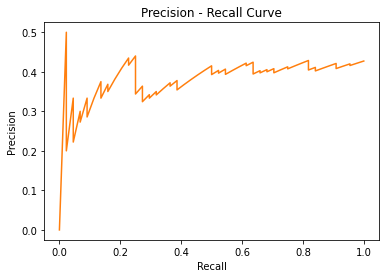

In [139]:
def precision_recall():
    """non 0 rel are relevant"""
    # total= len(prec_recall_data)
    counts = prec_recall_data[0].value_counts()
    rel_docs = sum(counts[1:])
    # not_rel_docs = counts[0]
    retieved_rel_docs=0
    ranked_data = prec_recall_data.sort_values(by=['tf'],ascending=False)
    precision=[]
    recall=[]
    # print(counts)
    for i in range(0,len(ranked_data)):
        if(ranked_data.iloc[i,0]!=0):
            # print(ranked_data.iloc[i,:])
            retieved_rel_docs=retieved_rel_docs+1
        precision.append(retieved_rel_docs/(i+1))
        recall.append(retieved_rel_docs/rel_docs)
    # print(ranked_data)    
    plt.plot(recall, precision,color="tab:orange")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall Curve')
    plt.show()
    # print(rel_docs)
precision_recall()
    